# **다중 선형 회귀분석**

In [1]:
# 사용할 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## **Scikit-Learn에서 Dataset 불러오기**


In [2]:
from sklearn import datasets

In [3]:
data = datasets.fetch_california_housing(as_frame=True)

### Dataset 살펴보기

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

### **독립변수 할당**

In [6]:
x = data.data

In [7]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
type(x)

pandas.core.frame.DataFrame

### **종속변수 할당**

In [9]:
y = data.target

In [10]:
y

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [11]:
type(y)

pandas.core.series.Series

### **독립변수 및 종속변수 요약**

In [12]:
x.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


### **독립변수와 종속변수 사이의 상관계수 계산**

In [14]:
col_names = np.array(x.columns)
print(col_names)

['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']


In [15]:
corr_coef_dict = {}

for col_name in col_names :
  corr_coef_dict[col_name] = [np.corrcoef(x[col_name], np.array(y))[0][1]] # 전제 데이터에 대한 상관계수 계산

In [16]:
corr_coef_dict

{'MedInc': [np.float64(0.6880752079585475)],
 'HouseAge': [np.float64(0.10562341249320989)],
 'AveRooms': [np.float64(0.15194828974145774)],
 'AveBedrms': [np.float64(-0.04670051296948685)],
 'Population': [np.float64(-0.024649678888894886)],
 'AveOccup': [np.float64(-0.023737412956134345)],
 'Latitude': [np.float64(-0.1441602768746593)],
 'Longitude': [np.float64(-0.045966615117978546)]}

In [17]:
corr_coef_df = pd.DataFrame(data=corr_coef_dict).transpose()
corr_coef_df.columns = ["Corr. Coef."]

In [18]:
corr_coef_df

,Corr. Coef.
MedInc,0.688075
HouseAge,0.105623
AveRooms,0.151948
AveBedrms,-0.046701
Population,-0.024650
AveOccup,-0.023737
Latitude,-0.144160
Longitude,-0.045967


#### **각 점과의 상관계수 시각화**

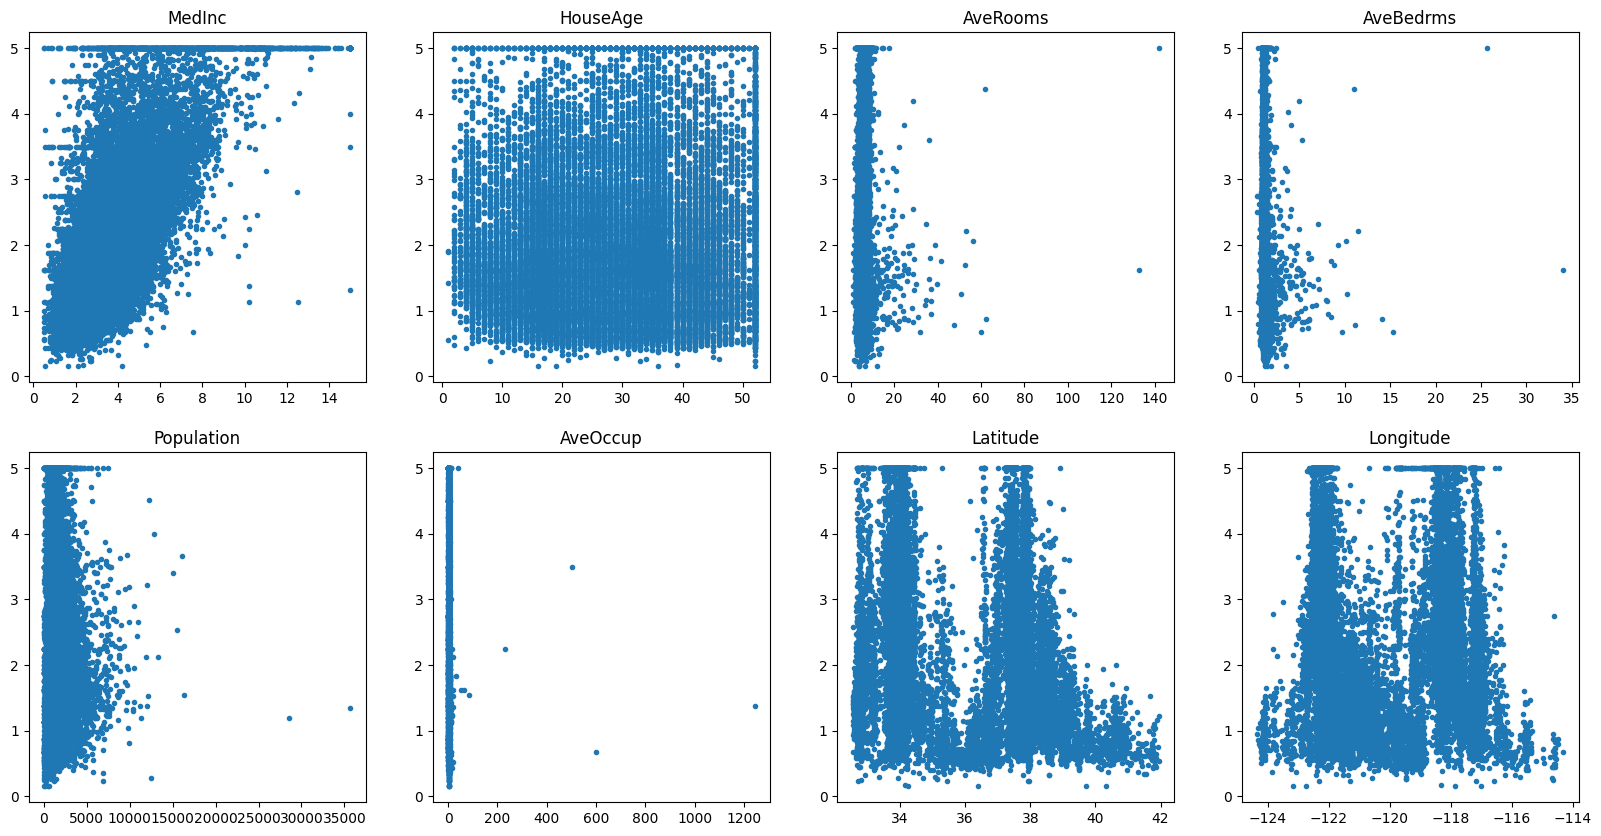

In [19]:
plt.figure(figsize=(20,10))

for i, col_name in enumerate(col_names) :
  plt.subplot(2, 4, i+1)
  plt.scatter(x[col_name], np.array(y), marker=".")
  plt.title(f"{col_name}")

plt.show()

### **모델의 일반성 측정을 위한 Dataset 분리**

In [20]:
dataset_size = x.shape[0]
print(f"Dataset Size : {dataset_size}")

Dataset Size : 20640


In [21]:
train_ds, test_ds = int(0.8*dataset_size), dataset_size-int(0.8*dataset_size)  # 4대1 비율로 훈련 및 시험 데이터셋 구성

In [22]:
print(f"Train Dataset Size : {train_ds}")
print(f"Test Dataset Size : {test_ds}")

Train Dataset Size : 16512
Test Dataset Size : 4128


## **Bias 없는 다중 선형 회귀 모델**

### Dataset 샘플링 진행

In [23]:
x_train, y_train = x[:train_ds], y[:train_ds]
x_test, y_test = x[train_ds:], y[train_ds:]

### Pandas DF에서 Numpy Array로 데이터 구조 변환

In [24]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

### Dataset 규모 확인

In [25]:
print(f"Input Data Shape : {x_train.shape}")
print(f"Target Data Shape : {y_train.shape}")

Input Data Shape : (16512, 8)
Target Data Shape : (16512,)


### **다중 선형 회귀 모델 매개변수 계산**

*   행렬 곱셉 → np.matmul
*   역행렬 → np.linalg.inv
*   x(np.array) -> x.T(Transposed Matrix)

In [26]:
def get_param(x:np.array, y:np.array) :
  # 코드를 작성해주세요
  output = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
  return output


In [27]:
betaHat = get_param(x_train, y_train) # 매개변수 추론

#### 정답

In [28]:
def get_param(x:np.array, y:np.array) :
  output = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
  return output

### **다중 선형 회귀 모델 추론**

In [29]:
y_train_hat = np.matmul(x_train, betaHat)
print(y_train_hat)

[4.01874892 3.79331872 3.46245236 ... 1.66744785 1.26923406 1.36417029]


In [30]:
y_test_hat = np.matmul(x_test, betaHat)
print(y_test_hat)

[1.24873953 1.5090059  1.076929   ... 0.5416027  0.66845879 0.91097458]


#### 정답

In [31]:
y_train_hat = np.matmul(x_train, betaHat)
print(y_train_hat)

y_test_hat = np.matmul(x_test, betaHat)
print(y_test_hat)

[4.01874892 3.79331872 3.46245236 ... 1.66744785 1.26923406 1.36417029]
[1.24873953 1.5090059  1.076929   ... 0.5416027  0.66845879 0.91097458]


### **다중 선형 회귀 모델 성능 평가**

#### Bar Chart를 활용한 정성적 평가

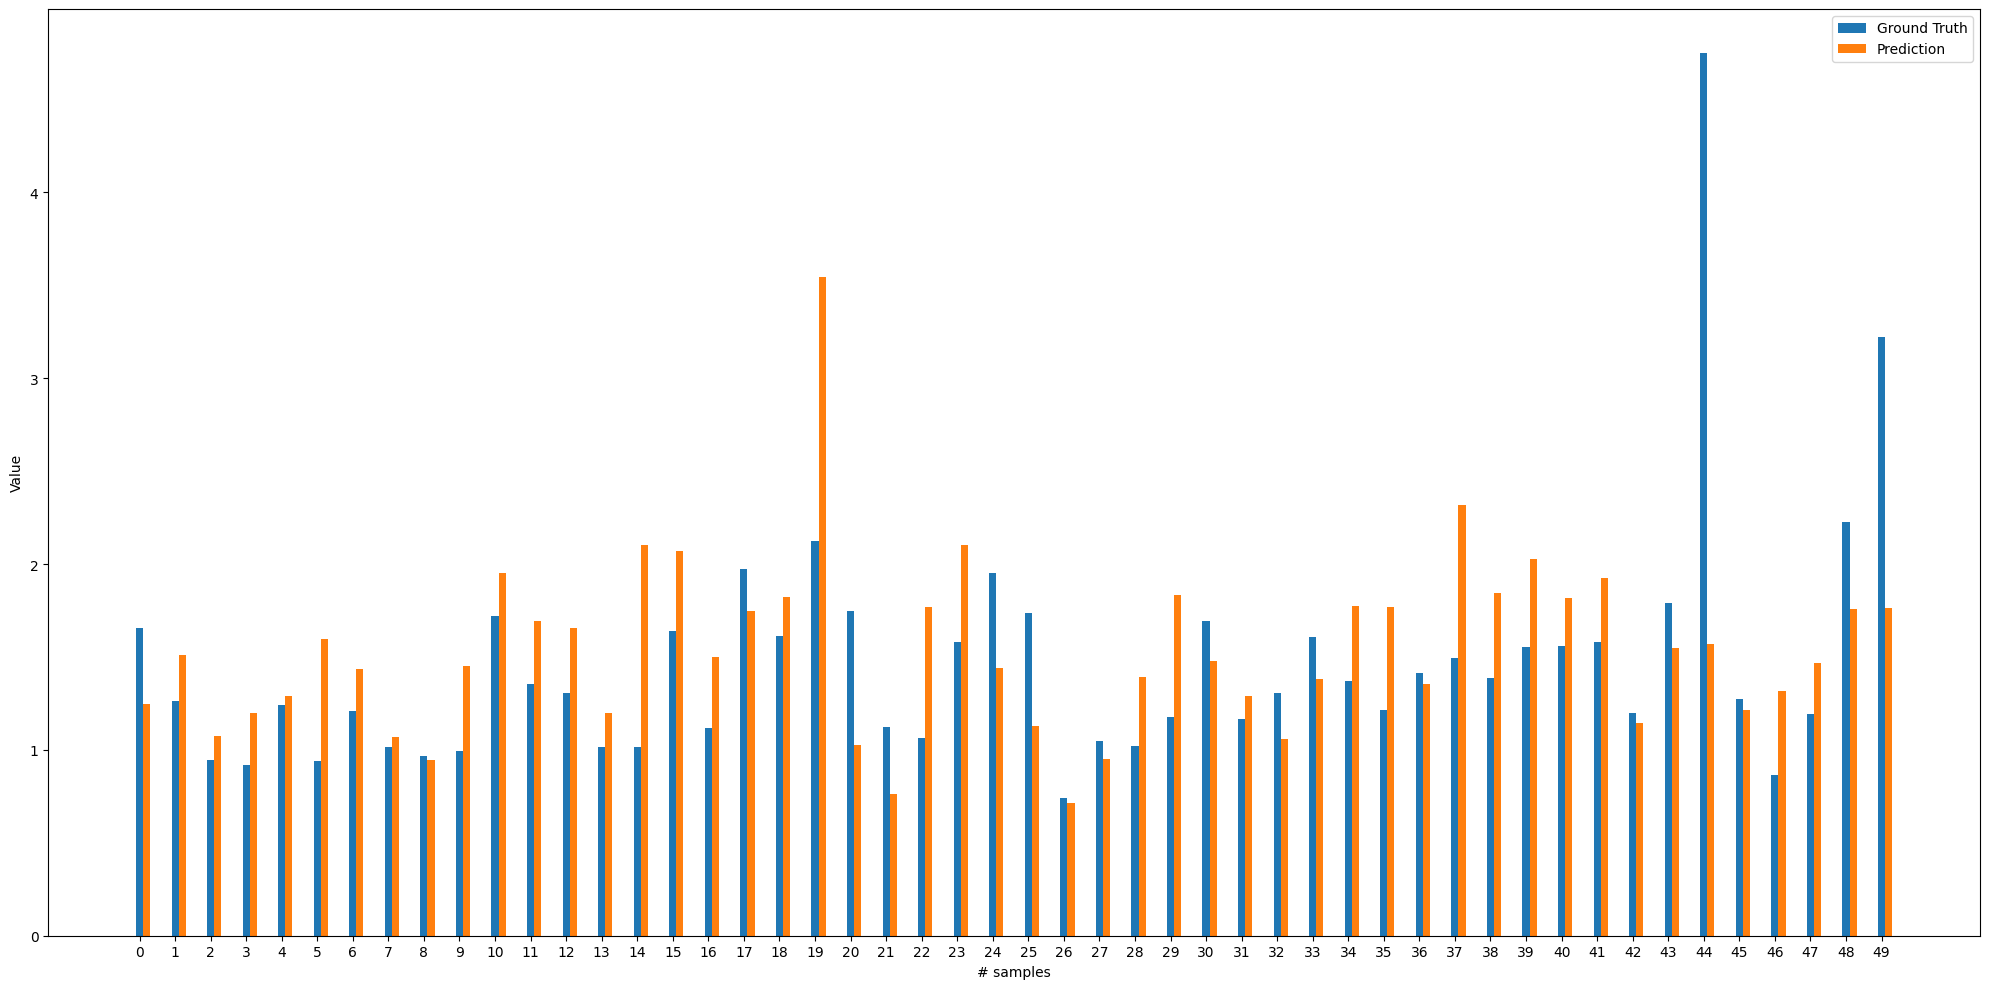

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
idx = np.asarray([i for i in range(50)])
width = 0.2

ax.bar(idx, y_test[:50], width=width)
ax.bar(idx+width, y_test_hat[:50], width=width)
ax.set_xticks(idx)
ax.legend(["Ground Truth", "Prediction"])
ax.set_xlabel("# samples")
ax.set_ylabel("Value")

fig.tight_layout()
plt.show()

#### **정량적 평가**

##### **손실함수 (RMSE)**



*   제곱 → np.power
*   평균 → np.mean
*   제곱근 → np.sqrt



In [33]:
def RMSE(y_hat:np.array, y_target:np.array) :
  # 코드를 작성해주세요
  output = np.sqrt(np.mean(np.power(y_hat-y_target, 2)))
  return output

In [34]:
train_loss = RMSE(y_train_hat, y_train)
print(train_loss)

0.771068847321462


In [35]:
test_loss = RMSE(y_test_hat, y_test)
print(test_loss)

0.8294121145765343


###### 정답

In [36]:
def RMSE(y_hat:np.array, y_target:np.array) :
  output = np.sqrt(np.mean(np.power(y_hat-y_target, 2)))
  return output

##### **R2 Score**

In [37]:
def R2Score(y_hat:np.array, y_target:np.array) :
  # 코드를 작성해주세요
  mse = np.mean(np.power(y_hat-y_target, 2))
  var = np.var(y_target)
  output = 1-(mse/var)
  return output

In [38]:
train_r2 = R2Score(y_train_hat, y_train)
print(train_r2)

0.5386393512074401


In [39]:
test_r2 = R2Score(y_test_hat, y_test)
print(test_r2)

0.5279000602285487


###### 정답

In [40]:
def R2Score(y_hat:np.array, y_target:np.array) :
  mse = np.mean(np.power(y_hat-y_target, 2))
  var = np.var(y_target)
  output = 1-(mse/var)
  return output

##### **Scikit-Learn을 활용한 R2 Score 계산**

In [41]:
from sklearn.metrics import r2_score

In [42]:
train_r2 = r2_score(y_train, y_train_hat)
print(train_r2)

0.5386393512074401


In [43]:
test_r2 = r2_score(y_test, y_test_hat)
print(test_r2)

0.5279000602285486


## **Bias가 존재하는 다중 선형 회귀 모델**

In [44]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
x["Bias"] = np.ones(x.shape[0]) # Bias Column을 새롭게 추가

#### 새로운 Dataset 확인

In [46]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Bias
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,1.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,1.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,1.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,1.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,1.0
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,1.0
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,1.0
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,1.0
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,1.0


### Dataset 샘플링 진행

In [47]:
x_train, y_train = x[:train_ds], y[:train_ds]
x_test, y_test = x[train_ds:], y[train_ds:]

### Pandas DF에서 Numpy Array로 데이터 구조 변환

In [48]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_test, y_test = np.array(x_test), np.array(y_test)

### Dataset 규모 확인

In [49]:
print(f"Input Data Shape : {x_train.shape}")
print(f"Target Data Shape : {y_train.shape}")

Input Data Shape : (16512, 9)
Target Data Shape : (16512,)


### **다중 선형 회귀 모델 매개변수 계산**

In [50]:
betaHatwB = get_param(x_train, y_train) # 매개변수 추론

### **다중 선형 회귀 모델 추론**

In [51]:
y_train_hat_with_bias = np.matmul(x_train, betaHatwB)
print(y_train_hat_with_bias)

[4.13990412 3.99944157 3.65722325 ... 1.72775495 1.41929122 1.50058709]


In [52]:
y_test_hat_with_bias = np.matmul(x_test, betaHatwB)
print(y_test_hat_with_bias)

[1.31635001 1.58760352 1.11744227 ... 0.14384532 0.29510241 0.49760107]


#### 정답

In [53]:
y_train_hat_with_bias = np.matmul(x_train, betaHatwB)
print(y_train_hat)

y_test_hat_with_bias = np.matmul(x_test, betaHatwB)
print(y_test_hat)

[4.01874892 3.79331872 3.46245236 ... 1.66744785 1.26923406 1.36417029]
[1.24873953 1.5090059  1.076929   ... 0.5416027  0.66845879 0.91097458]


### **다중 선형 회귀 모델 성능 평가**

#### Bar Chart를 활용한 정성적 평가

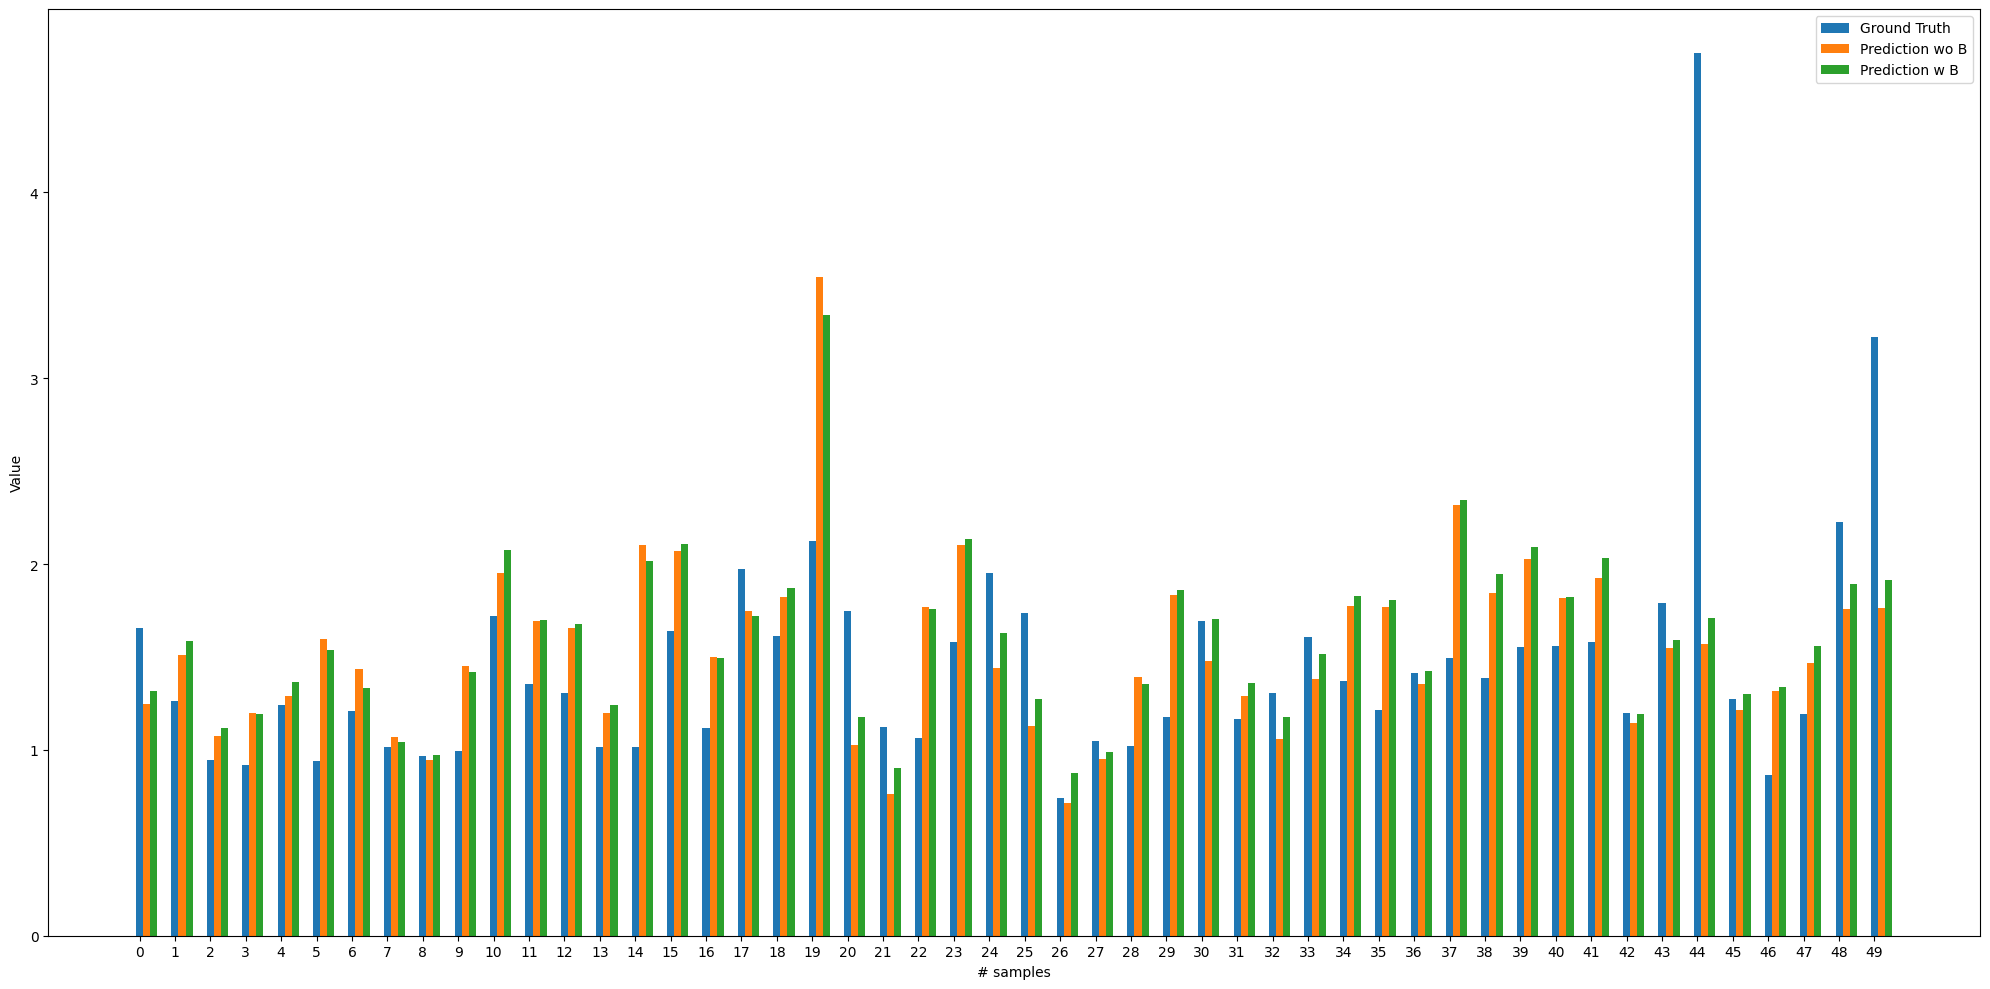

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
idx = np.asarray([i for i in range(50)])
width = 0.2

ax.bar(idx, y_test[:50], width=width)
ax.bar(idx+width, y_test_hat[:50], width=width)
ax.bar(idx+2*width, y_test_hat_with_bias[:50], width=width)
ax.set_xticks(idx)
ax.legend(["Ground Truth", "Prediction wo B", "Prediction w B"])
ax.set_xlabel("# samples")
ax.set_ylabel("Value")

fig.tight_layout()
plt.show()

#### **정량적 평가**

##### **손실함수 (RMSE)**

In [55]:
train_loss = RMSE(y_train_hat_with_bias, y_train)
print(train_loss)

0.7318017535424258


In [56]:
test_loss = RMSE(y_test_hat_with_bias, y_test)
print(test_loss)

0.7033383507515615


##### **R2 Score**

In [57]:
train_r2 = r2_score(y_train, y_train_hat_with_bias)
print(train_r2)

0.5844329298051016


In [58]:
test_r2 = r2_score(y_test, y_test_hat_with_bias)
print(test_r2)

0.6605140591538038


# **[ 다중 선형 회귀분석 개인 실습 ]**

## Diabetes Dataset을 불러온 후 다중 선형 회귀분석을 진행하세요. (10분 소요)



1.   Bias Column을 추가하세요.
2.   Dataset을 4대1 기준으로 분리하세요. (훈련:4 & 시험:1)
3.   다중 선형 회귀분석을 진행한 후 정답과 추론 값을 비교하는 Bar Chart를 출력하세요.
4.   RMSE Loss를 계산하세요.
5.   R2 Score를 계산하세요.


In [59]:
data = datasets.load_diabetes(as_frame=True)

In [61]:
x = data.data

In [62]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [63]:
y = data.target

In [64]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [65]:
x["Bias"] = np.ones(x.shape[0])

In [66]:
train_ds, test_ds = int(0.8*dataset_size), dataset_size-int(0.8*dataset_size)  # 4대1 비율로 훈련 및 시험 데이터셋 구성